# Coding Exercises

## Financial Data Analysis

### Exercise 2: Financial Time Series

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the us stocks dataset (__us_stocks.csv__) and select the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

In [5]:
import pandas as pd

stocks = pd.read_csv('us_stocks.csv', header=[0, 1], index_col=[0], parse_dates=[0])
stocks.head()

Open                                                  \
                  AXP  FB       INTC        MCD         PG        WMT   
Date                                                                    
2009-12-31  40.900002 NaN  20.600000  62.970001  61.520000  54.250000   
2010-01-04  40.810001 NaN  20.790001  62.630001  61.110001  53.740002   
2010-01-05  40.830002 NaN  20.940001  62.660000  61.130001  54.090000   
2010-01-06  41.230000 NaN  20.809999  62.200001  60.939999  53.500000   
2010-01-07  41.259998 NaN  20.730000  61.250000  60.580002  53.720001   

                 High                        ...  Adj Close             \
                  AXP  FB       INTC    MCD  ...       INTC        MCD   
Date                                         ...                         
2009-12-31  41.080002 NaN  20.719999  63.07  ...  15.252899  47.055138   
2010-01-04  41.099998 NaN  21.030001  63.07  ...  15.611791  47.311375   
2010-01-05  41.230000 NaN  20.990000  62.75  ...  15.604316  46.949627   
2010-01-06  41.669998 NaN  20.930000  62.41  ...  15.551979  46.309067   
2010-01-07  42.240002 NaN  20.760000  62.34  ...  15.402434  46.648193   

                                    Volume                                   \
                   PG        WMT       AXP  FB      INTC       MCD       PG   
Date                                                                          
2009-12-31  45.146072  42.548668   4030500 NaN  26429200   4495300  5942200   
2010-01-04  45.510941  43.169579   6894300 NaN  47800900   5839300  9190800   
2010-01-05  45.525822  42.739723  10641200 NaN  52357700   7099000  8649400   
2010-01-06  45.309883  42.644184   8399400 NaN  40037400  10551300  9908400   
2010-01-07  45.064171  42.668079   8981700 NaN  54041500   7517700  8972800   

                      
                 WMT  
Date                  
2009-12-31   9764800  
2010-01-04  20753100  
2010-01-05  15648400  
2010-01-06  12517200  
2010-01-07  10662700  

[5 rows x 36 columns]

In [6]:
stocks = stocks.loc['2015-12-31':'2018-12-31', 'Adj Close']
stocks

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-04,64.052849,102.220001,31.017828,108.452126,70.514938,56.870766
2016-01-05,63.067310,102.730003,30.871820,109.946350,70.739891,58.221748
2016-01-06,61.315948,102.970001,30.187403,109.208458,70.056053,58.804699
2016-01-07,60.763893,97.919998,29.055828,106.681190,69.444221,60.174198
...,...,...,...,...,...,...
2018-12-21,90.957733,124.949997,44.557564,174.149994,90.256142,87.129997
2018-12-24,89.135193,124.059998,43.315437,170.279999,86.674469,85.820000
2018-12-26,93.457497,134.179993,45.899059,174.029999,89.383041,90.410004


- __Visualize__ the Adjusted Close of the six stocks __over time__!

<AxesSubplot:xlabel='Date'>

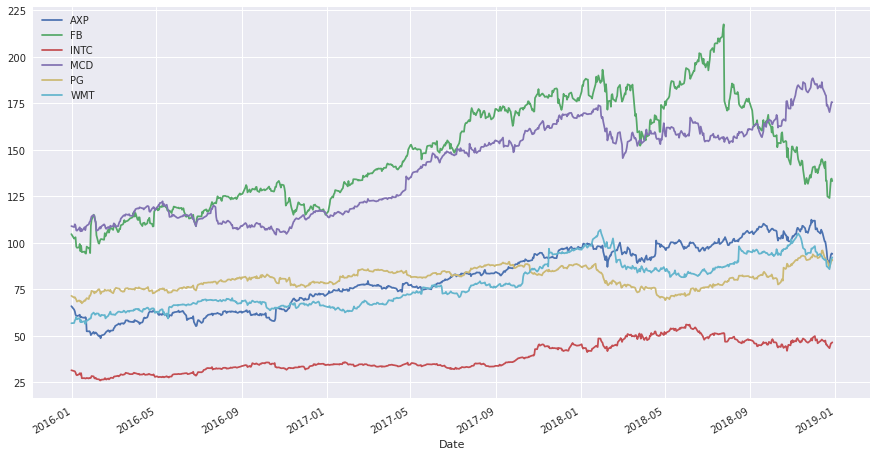

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
stocks.plot(figsize=(15, 8))

- __Visualize__ the __normalized__ Adjusted Close of the six stocks __over time__, each starting at a __Base Value of 100__!

<AxesSubplot:xlabel='Date'>

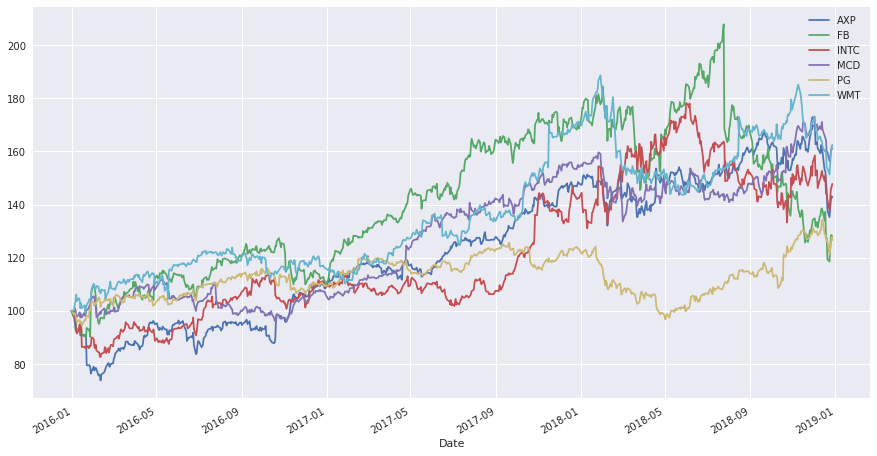

In [11]:
base_prices = stocks.iloc[0]
norm = stocks.div(base_prices).mul(100)
norm.plot(figsize=(15, 8))

- Calculate __monthly returns__ for all six stocks and create a new __returns__ DataFrame!

In [16]:
returns = stocks.resample('BM').last().pct_change().dropna().mul(100).copy()
returns.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2016-01-29,-22.740258,7.213830,-9.956423,4.774000,3.767677,8.254512
2016-02-29,3.887854,-4.714376,-3.770349,-4.606720,-1.713792,-0.030162
2016-03-31,10.471401,6.715301,9.327461,7.244646,2.515858,4.005148
2016-04-29,7.079421,3.049960,-6.398767,0.644480,-1.863878,-2.365280
2016-05-31,0.504369,1.046093,5.227443,-3.502229,1.148254,6.622147


- Calculate the __annualized mean return__ and the __annualized standard deviation__ of returns for all six stocks!

In [20]:
returns.mean() # monthly average

AXP     1.216187
FB      0.865567
INTC    1.255936
MCD     1.417869
PG      0.735810
WMT     1.499687
dtype: float64

In [21]:
ar = returns.mean().div(100).add(1).pow(12).sub(1).mul(100)
ar

AXP     15.611132
FB      10.895826
INTC    16.157138
MCD     18.406015
PG       9.195962
WMT     19.557392
dtype: float64

In [24]:
astd = returns.std().mul(12**0.5)
astd

AXP     22.674792
FB      21.887091
INTC    20.425477
MCD     14.485862
PG      13.837425
WMT     18.724733
dtype: float64

- __Visualize risk/return__ of all six stocks in a (total) risk / return framework. (annualized std on the x-axis, annualized mean returns on the y-axis). <br>
Identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)

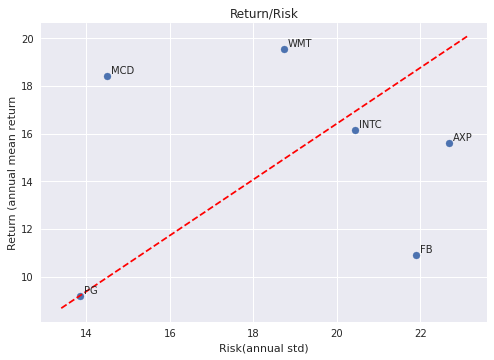

In [38]:
plt.scatter(x=astd, y=ar)
for ticker in ar.index:
    plt.annotate(ticker, xy=(astd.loc[ticker]+0.1, ar.loc[ticker]+0.1))
plt.plot(plt.xlim(), plt.ylim(), c="red", ls="--")
plt.xlabel("Risk(annual std)")
plt.ylabel("Return (annual mean return")
plt.title("Return/Risk")
plt.show()

In [41]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-29 to 2018-12-31
Freq: BM
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AXP     36 non-null     float64
 1   FB      36 non-null     float64
 2   INTC    36 non-null     float64
 3   MCD     36 non-null     float64
 4   PG      36 non-null     float64
 5   WMT     36 non-null     float64
dtypes: float64(6)
memory usage: 2.0 KB


In [40]:
ar.div(astd).sort_values(ascending=False)

MCD     1.270619
WMT     1.044468
INTC    0.791029
AXP     0.688480
PG      0.664572
FB      0.497820
dtype: float64

- __Visualize__ the __correlation matrix__ of monthly returns with a __Seaborn Heatmap__. Which stocks-pair shows the __highest (positive) correlation__ of monthly returns?

In [42]:
returns.corr()

,AXP,FB,INTC,MCD,PG,WMT
AXP,1.000000,0.068655,0.306292,0.261880,-0.099335,-0.048483
FB,0.068655,1.000000,0.169326,0.069091,-0.008261,0.149272
INTC,0.306292,0.169326,1.000000,0.084089,-0.074533,0.129686
MCD,0.261880,0.069091,0.084089,1.000000,0.177252,0.505501
PG,-0.099335,-0.008261,-0.074533,0.177252,1.000000,0.359595
WMT,-0.048483,0.149272,0.129686,0.505501,0.359595,1.000000


<AxesSubplot:>

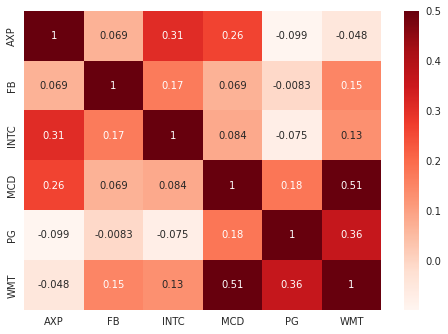

In [48]:
import seaborn

seaborn.heatmap(returns.corr(),cmap="Reds", annot=True, vmax="0.5")

__Ticker Symbols__:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

------------------------

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
#run the cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

1. __Import__ daily stock price data (__us_stocks.csv__) and __inspect__! Handle the __MultiIndex__! __Fill in the gaps__!

In [ ]:
stocks = pd.read_csv("us_stocks.csv", header = ---, index_col= ---, parse_dates= ---)

In [ ]:
# run the cell!
stocks.head()

Ticker Symbols:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

2. __Select__ the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.)! __Overwrite__ stocks! <br>
__How many Timestamps__ / Days are in the DataFrame now?

In [ ]:
# run the cell!
stocks.head()

In [ ]:
# run the cell!
stocks.info()

We have ... 754 Days.

3. __Plot__ stocks (figsize (12, 8)!

4. __Bring__ the six stocks to the __same Base Value__ (100) and __plot__ again! __Fill in the gaps!__

In [ ]:
stocks.---(stocks.iloc[0]).---(figsize = (12,8))
plt.show()

Still hard to compare performance, right?

5. __Resample__ stocks to __monthly__ frequency (__last__ trading price of each month, index should show last calender day)!<br> __Save__ the resampled Dataframe in the variable __stocks_m__!

In [ ]:
# run the cell!
stocks_m.head()

6. Calculate __monthly returns__ and __save__ the result in the variable __ret__! (drop NaN Values!)

In [ ]:
#run the cell!
ret

7. Calculate __mean__ and  __standard deviation__ of monthly returns! __Save__ the result in the variable __summary__!<br>
__Fill in the gaps!__

In [ ]:
summary = ret.describe().T.loc[:, [---, ---]]

In [ ]:
#run the cell!
summary

8. __Annualize__ mean and standard deviation of returns! __Fill in the gaps!__

In [ ]:
summary["mean"] = summary["mean"]*---
summary["std"] = summary["std"]*---(---)

In [ ]:
#run the cell!
summary

9. __Plot__ and __compare__ the performance of the six stocks in a __(total) risk / return__ framework! __Fill in the gaps__! <br>
Can you identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)?

In [ ]:
summary.plot(kind = "---", x = "---", y = "---", figsize = (12, 8), s = 50, fontsize = 15, xlim = (0.1, 0.3), ylim = (0, 0.25))
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In a (total) risk / return framework, McDonalds (most likely) showed the best performance (upper left) and facebook the worst performance (lower right)!

10. Prepare the __correlation matrix__ of monthly returns. Which stocks-pair shows the __highest (positive) correlation__ of monthly returns? 

The highest positive correlation of returns is between ... Walmart and McDonalds.

11. __Visualize__ the correlation matrix with a __Seaborn Heatmap__! __Fill in the gaps!__

In [ ]:
# run the cell!
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.0)
sns.---(---, cmap = "RdYlGn", annot = True, vmin = -0.5, vmax = 0.6, center = 0)
plt.show()

# Solutions (Stop here if you want to code on your own!)

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
#run the cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

1. __Import__ daily stock price data (__us_stocks.csv__) and __inspect__! Handle the __MultiIndex__! __Fill in the gaps__!

In [ ]:
stocks = pd.read_csv("us_stocks.csv", header = [0,1], index_col= [0], parse_dates= [0])

In [ ]:
# run the cell!
stocks.head()

Ticker Symbols:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

2. __Select__ the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.)! __Overwrite__ stocks! <br>
__How many Timestamps__ / Days are in the DataFrame now?

In [ ]:
stocks = stocks.loc["31-12-2015":"31-12-2018", "Adj Close"]

In [ ]:
# run the cell!
stocks.head()

In [ ]:
# run the cell!
stocks.info()

We have ... 754 Days.

3. __Plot__ stocks (figsize (12, 8)!

In [ ]:
stocks.plot(figsize = (12,8))
plt.show()

4. __Bring__ the six stocks to the __same Base Value__ (100) and __plot__ again! __Fill in the gaps!__

In [ ]:
stocks.div(stocks.iloc[0]).mul(100).plot(figsize = (12,8))
plt.show()

Still hard to compare performance, right?

5. __Resample__ stocks to __monthly__ frequency (__last__ trading price of each month, index should show last calender day)!<br> __Save__ the resampled Dataframe in the variable __stocks_m__!

In [ ]:
stocks_m = stocks.resample("M").last()

In [ ]:
# run the cell!
stocks_m.head()

6. Calculate __monthly returns__ and __save__ the result in the variable __ret__! (drop NaN Values!)

In [ ]:
ret = stocks_m.pct_change().dropna()

In [ ]:
#run the cell!
ret

7. Calculate __mean__ and  __standard deviation__ of monthly returns! __Save__ the result in the variable __summary__!<br>
__Fill in the gaps!__

In [ ]:
summary = ret.describe().T.loc[:, ["mean", "std"]]

In [ ]:
#run the cell!
summary

8. __Annualize__ mean and standard deviation of returns! __Fill in the gaps!__

In [ ]:
summary["mean"] = summary["mean"]*12
summary["std"] = summary["std"]*np.sqrt(12)

In [ ]:
#run the cell!
summary

9. __Plot__ and __compare__ the performance of the six stocks in a __(total) risk / return__ framework! __Fill in the gaps__! <br>
Can you identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)?

In [ ]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (12, 8), s = 50, fontsize = 15, xlim = (0.1, 0.3), ylim = (0, 0.25))
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In a (total) risk / return framework, McDonalds (most likely) showed the best performance (upper left) and facebook the worst performance (lower right)!

10. Prepare the __correlation matrix__ of monthly returns. Which stocks-pair shows the __highest (positive) correlation__ of monthly returns? 

In [ ]:
ret.corr()

The highest positive correlation of returns is between ... Walmart and McDonalds.

11. __Visualize__ the correlation matrix with a __Seaborn Heatmap__! __Fill in the gaps!__

In [ ]:
# run the cell!
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.0)
sns.heatmap(ret.corr(), cmap = "RdYlGn", annot = True, vmin = -0.5, vmax = 0.6, center = 0)
plt.show()

# Well Done!

-------------------